<a href="https://colab.research.google.com/github/Randa1989/Demo/blob/main/Shoe_Prices_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")
from google.colab import files
import io
data=files.upload()

Saving Shoe prices.csv to Shoe prices.csv


In [2]:
df=pd.read_csv(io.StringIO(data['Shoe prices.csv'].decode('utf-8')))

In [3]:
df.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [4]:
df.columns

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price (USD)'],
      dtype='object')

In [5]:
df.shape

(1006, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [7]:
df.isnull().sum()

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

In [8]:
df.duplicated().sum()

81

In [9]:
df['Price (USD)'] = df['Price (USD)'].str.replace('$','').astype(float)
df['Size'] = df['Size'].str.replace('US ','').astype(float)

Distribution of Price¶


<AxesSubplot:xlabel='Price (USD)', ylabel='Density'>

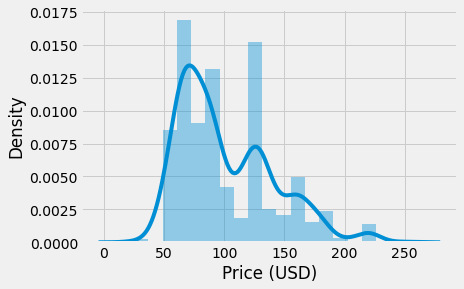

In [10]:
sns.distplot(df['Price (USD)'])


Shoes count and price by Gender¶


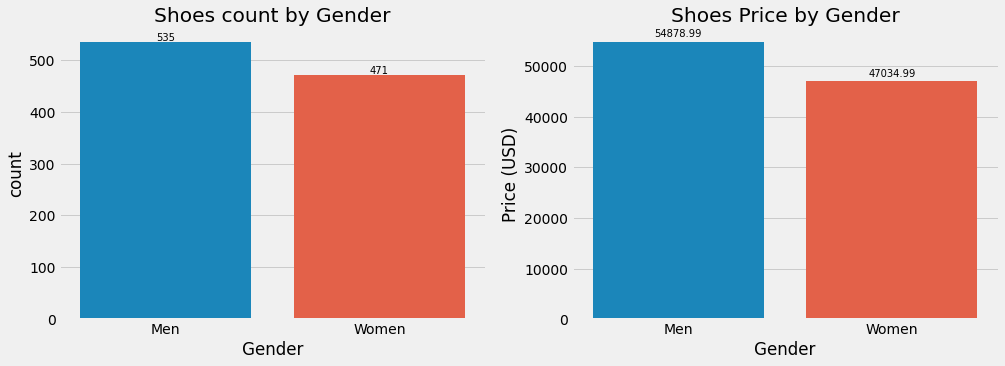

In [11]:
gender = df['Gender'].value_counts().reset_index().rename(columns={'index':'Gender','Gender':'count'})
gender_price = df.groupby('Gender')['Price (USD)'].sum().reset_index()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
g = sns.barplot(data=gender,x='Gender',y='count')
for v in gender.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+2,s=str(v.count), size=10, ha="center")
plt.title('Shoes count by Gender')

plt.subplot(1,2,2)
g = sns.barplot(data=gender_price,x='Gender',y='Price (USD)')
for v in gender_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+1e3,s=str(v._2), size=10, ha="center")
plt.title('Shoes Price by Gender')
plt.show()


Top 10 Brand¶


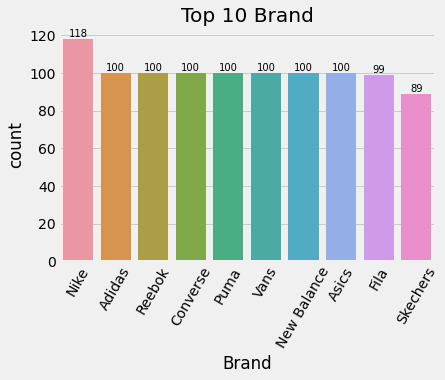

In [12]:
brand = df['Brand'].value_counts().reset_index().rename(columns={'index':'Brand','Brand':'count'})
g = sns.barplot(data=brand,x='Brand',y='count')
for v in brand.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1,s=str(v.count), size=10, ha="center")
plt.title('Top 10 Brand')
plt.xticks(rotation=60)
plt.show()

Most sell Model by Brand¶


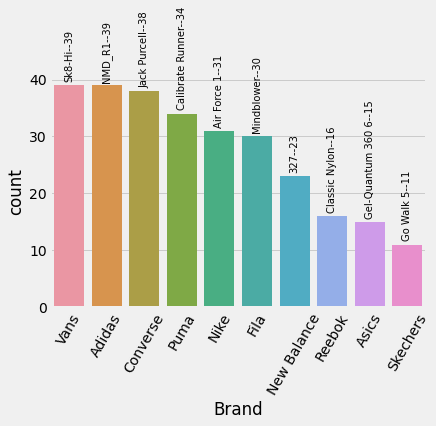

In [13]:
brand_model_count = df.groupby(['Brand','Model']).size().reset_index(name='count').sort_values('count',ascending=False)
brand_model_count = brand_model_count.groupby('Brand').head(1).reset_index(drop=True)
g = sns.barplot(data=brand_model_count,x='Brand',y='count')
model = brand_model_count['Model']
for v in brand_model_count.itertuples():
    #print(v.Index)
    g.text(x=v.Index,y=v.count+1,s=str(v.Model + '--' +str(round(v.count, 2))), size=10, rotation=90, ha="center")   
plt.xticks(rotation=60)
plt.show()

Model with highest sell Price by Brand¶


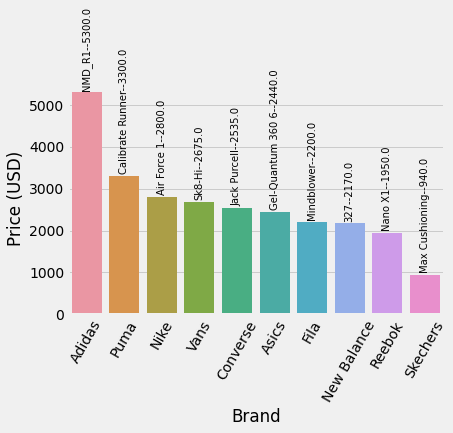

In [14]:
brand_model_price = df.groupby(['Brand','Model'])['Price (USD)'].sum().reset_index().sort_values('Price (USD)',ascending=False)
brand_model_price = brand_model_price.groupby('Brand').head(1).reset_index(drop=True)
g = sns.barplot(data=brand_model_price,x='Brand',y='Price (USD)')
model = brand_model_price['Model']
for v in brand_model_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._3+100,s=str(v.Model + '--' +str(round(v._3, 2))), size=10, rotation=90, ha="center")   
plt.xticks(rotation=60)
plt.show()

Type by Gender¶


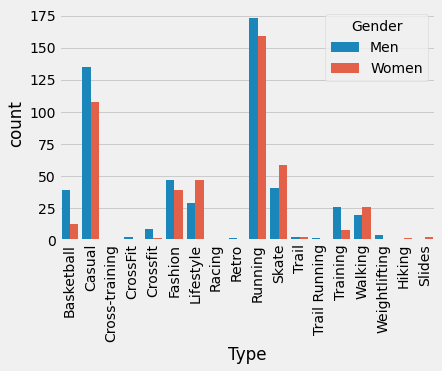

In [15]:
type_gender = df.groupby(['Gender','Type']).size().reset_index(name='count')
sns.barplot(data=type_gender,x='Type',y='count',hue='Gender')
plt.xticks(rotation=90)
plt.show()

Top 10 Most sell Type¶


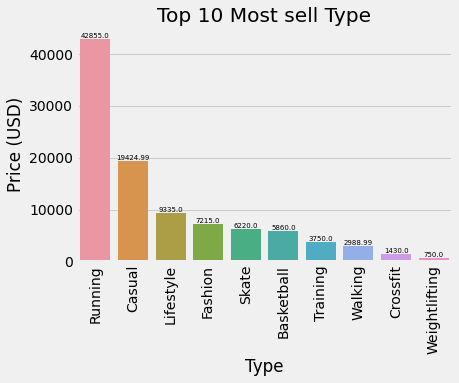

In [16]:
type_price = df.groupby('Type')['Price (USD)'].sum().reset_index().sort_values('Price (USD)',ascending=False).reset_index(drop=True).head(10)
g = sns.barplot(data=type_price,x='Type',y='Price (USD)')
for v in type_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+200,s=str(v._2), size=7, ha="center")
plt.title('Top 10 Most sell Type')
plt.xticks(rotation=90)
plt.show()

####Most of shoes are Black or White



Top 10 most sell Material¶


In [19]:
lst1 = []
for i in df.Color:
    lst1.append(i.split('/'))
#lst1
lst2 = []
for i in lst1:
    for j in i:
        lst2.append(j)
#lst2
from collections import Counter
Counter(lst2)

Counter({'Red': 63,
         'Black': 371,
         'White': 361,
         'Navy': 50,
         'Pink': 113,
         'Grey': 146,
         'Blue': 82,
         'Green': 39,
         'Yellow': 20,
         'Purple': 16,
         'Orange': 13,
         'Checkered': 3,
         'Beige': 4,
         'Cream': 11,
         'Zebra': 1,
         'Khaki': 1,
         'Checkerboard': 2,
         'Ivory': 2,
         'Egret': 3,
         'Gold': 5,
         'White Checkerboard': 1,
         'Cream White': 6,
         'Checkerboard Black': 2,
         'Cloud White': 2,
         'Multi-color': 1,
         'Sunflower': 1,
         'Silver': 4,
         'Gum': 1,
         'True White': 1,
         'Natural': 1,
         'Burgundy': 2,
         'Charcoal': 1,
         'Cinder': 1,
         'Brown': 1,
         'Clay Brown': 1,
         'Natural Ivory': 1,
         'Collegiate Navy': 1})

Most of shoes are Black or White



####Top 10 most sell Material¶



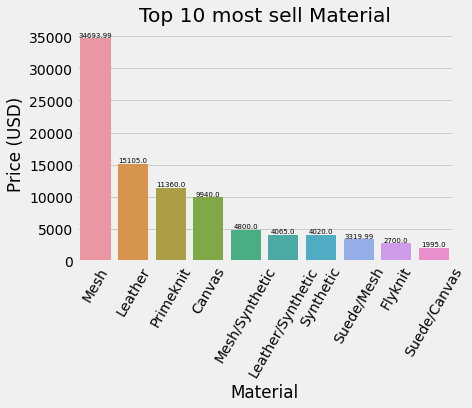

In [20]:
material_price = df.groupby('Material')['Price (USD)'].sum().reset_index().sort_values('Price (USD)',ascending=False).reset_index(drop=True).head(10)
g = sns.barplot(data=material_price,x='Material',y='Price (USD)')
for v in material_price.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+200,s=str(v._2), size=7, ha="center")
plt.title('Top 10 most sell Material')
plt.xticks(rotation=60)
plt.show()

Most used Material by Type¶


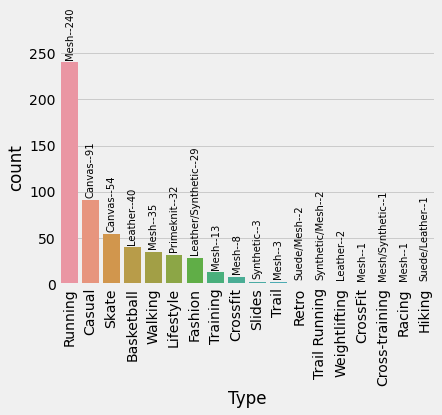

In [21]:
type_material = df.groupby(['Type','Material']).size().reset_index(name='count').sort_values('count',ascending=False)
type_material = type_material.groupby('Type').head(1).reset_index(drop=True)
g = sns.barplot(data=type_material,x='Type',y='count')
material = type_material['Material']
for v in type_material.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+5,s=str(v.Material + '--' +str(round(v.count, 2))), size=10, rotation=90, ha="center")   
plt.xticks(rotation=90)
plt.show()